# Task 7 of Second Machine Learning Homework
## Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:

```py
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))
```


**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.

### Start with generating data using provided code

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Dataset creation
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))

### Linear regression function - similar to task 2, 4, 5

In [13]:
def train_linear_regression(X, y, num_epochs=1000, lr=0.1):
    class LinearRegressionModel(torch.nn.Module):
        def __init__(self):
            super(LinearRegressionModel, self).__init__()
            self.linear = torch.nn.Linear(1, 1)

        def forward(self, x):
            return self.linear(x)

    # Normalize the input between 0 and 1
    X_min, X_max = X.min(), X.max()
    X_scaled = (X - X_min) / (X_max - X_min)

    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    model = LinearRegressionModel()

    # Define MSE loss and optimizer functions
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = []
    
    # Train
    for epoch in range(num_epochs):
        y_pred = model(X_tensor)
        loss = criterion(y_pred, y_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return model, X_min, X_max, losses

### Train models and plot data

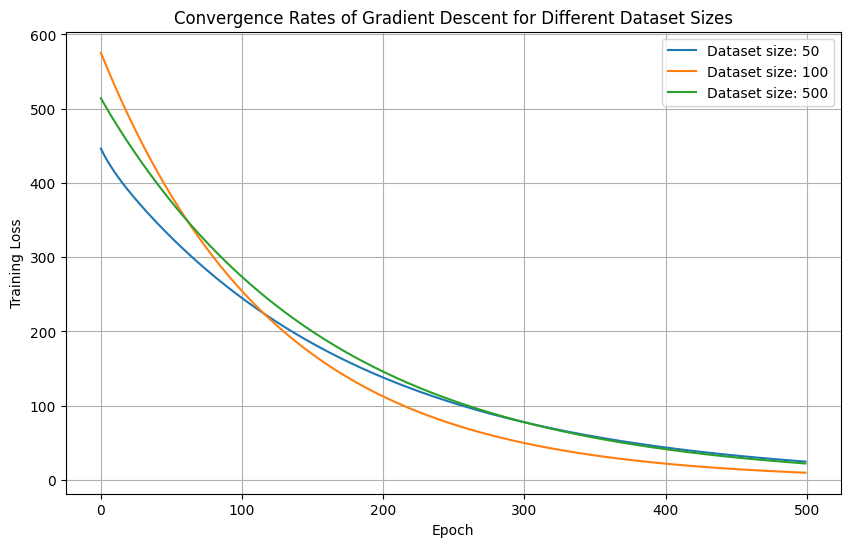

In [14]:
# Hyperparameters
num_epochs = 500
learning_rate = 0.025

# Train models on each dataset
results = []
for X, y in datasets:
    model, X_min, X_max, losses = train_linear_regression(X, y, num_epochs, learning_rate)
    results.append((model, losses))

# Plot convergence rates
plt.figure(figsize=(10, 6))
for i, (model, losses) in enumerate(results):
    plt.plot(range(num_epochs), losses, label=f"Dataset size: {sizes[i]}")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Convergence Rates of Gradient Descent for Different Dataset Sizes")
plt.legend()
plt.grid()
plt.show()

### Conclusions

Plot displays that the gradient descent algorithm performance is not significantly
affected by the dataset size.